# 

In [2]:
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [3]:
# load the data set
df = pd.read_csv(".\dataset\DenverCrime.txt", sep="\t")
df.head()

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Khushbu.Lad\AppData\Local\Temp\ipykernel_23432\3836129218.py:2: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv(".\dataset\DenverCrime.txt", sep="\t")


,Pop,Change,Child,Lunch,ChgInc,Income,Crime,ChgCrime,Year,Counsellor
0,6.9,1.8,30.2,58.3,27.3,"$51,338",84.9,-14.2,06/08/1971,Williams
1,8.4,28.5,38.8,87.5,39.8,"$50,625",172.6,-34.1,24/07/1973,Jones
2,5.7,7.8,31.7,83.5,26.0,"$54,825",154.2,-15.8,21/05/1963,Langlois
3,7.4,2.3,24.2,14.2,29.4,"$60,370",35.2,-13.9,11/02/1976,Langlois
4,8.5,-0.7,28.1,46.7,26.6,"$54,365",69.2,-13.9,08/07/1951,Langlois


 # Simple Linear Regression (SLR) - Example with Pop and Crime

In [12]:
# Reshape the data for the model

X_slr = df[['Pop']].values  # Predictor variable in 2D
#X_slr = df[['Lunch']].values  # Predictor variable in 2D
y = df['Crime'].values  # Response variable

#  Train the SLR model
slr_model = LinearRegression()
slr_model.fit(X_slr, y)

# Predictions for SLR
y_slr = slr_model.predict(X_slr)
print(f"SLR Intercept: {slr_model.intercept_}")
print(f"SLR Slope: {slr_model.coef_[0]}")
print(f"SLR R² Score: {r2_score(y, y_slr):.2f}")

SLR Intercept: 183.52691477560774
SLR Slope: -10.637780019776438
SLR R² Score: 0.13


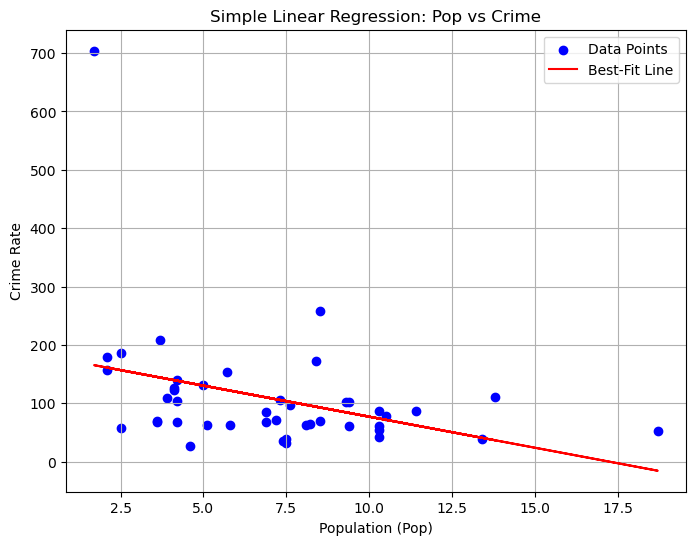

In [13]:
# Plot the data and the best-fit line
plt.figure(figsize=(8, 6))
plt.scatter(X_slr, y, color='blue', label='Data Points')
plt.plot(X_slr, y_slr, color='red', label='Best-Fit Line')
plt.xlabel('Population (Pop)')
plt.ylabel('Crime Rate')
plt.title('Simple Linear Regression: Pop vs Crime')
plt.legend()
plt.grid(True)
plt.show()

# Multiple Linear Regression (MLR) - Example with Pop, Child, and Lunch

In [18]:
# Define the predictor and response variables
X_mlr = df[['Pop', 'Child', 'Lunch']].values  # Multiple predictor variables
y = df['Crime'].values  # Response variable

# Train the MLR model
mlr_model = LinearRegression()
mlr_model.fit(X_mlr, y)
 

#  Predictions for MLR
y_mlr = mlr_model.predict(X_mlr)
print(f"MLR Intercept: {mlr_model.intercept_}")
print(f"MLR Coefficients: {mlr_model.coef_}")
print(f"MLR R² Score: {r2_score(y, y_mlr):.2f}")

MLR Intercept: 197.58729811839578
MLR Coefficients: [-7.59895039 -6.22030257  2.6047451 ]
MLR R² Score: 0.51


# Visualize MLR Predictions

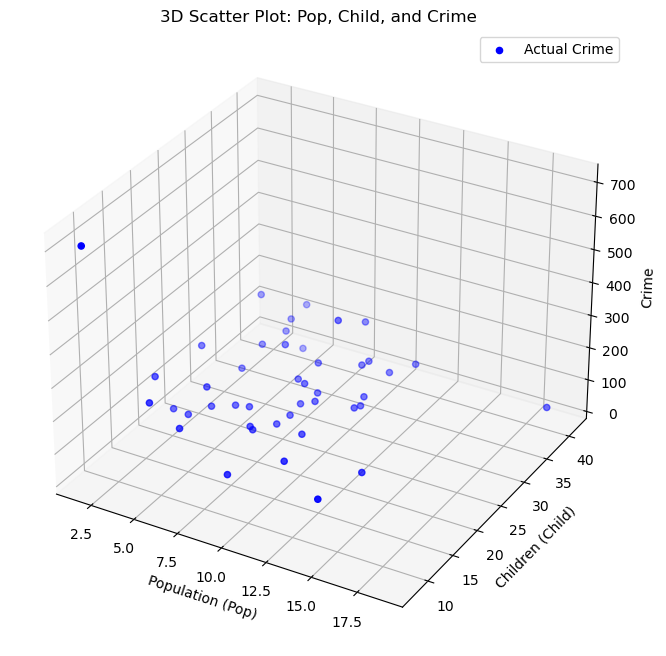

In [20]:
# 3D Plot for MLR with Pop, Child, and Crime (optional)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Pop'], df['Child'], y, color='blue', label='Actual Crime')
ax.set_xlabel('Population (Pop)')
ax.set_ylabel('Children (Child)')
ax.set_zlabel('Crime')
plt.title('3D Scatter Plot: Pop, Child, and Crime')
plt.legend()
plt.show()

# Evaluate Model Performance (SLR and MLR)

In [21]:
#R², MSE
print("Simple Linear Regression (SLR):")
print(f"R² Score: {r2_score(y, y_slr):.2f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y, y_slr):.2f}")

print("\nMultiple Linear Regression (MLR):")
print(f"R² Score: {r2_score(y, y_mlr):.2f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y, y_mlr):.2f}")



Simple Linear Regression (SLR):
R² Score: 0.13
Mean Squared Error (MSE): 9370.90

Multiple Linear Regression (MLR):
R² Score: 0.51
Mean Squared Error (MSE): 5302.44


In [26]:
# The statsmodels to get AIC, BIC, p-values, t-tests, and F-test
# Add a constant to the predictors for statsmodels to include an intercept
X_slr_const = sm.add_constant(X_slr)
X_mlr_const = sm.add_constant(X_mlr)

In [27]:
# Fit SLR model in statsmodels
sm_slr_model = sm.OLS(y, X_slr_const).fit()
print("\nSimple Linear Regression (SLR) Summary:")
print(sm_slr_model.summary())


Simple Linear Regression (SLR) Summary:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     6.263
Date:                Thu, 14 Nov 2024   Prob (F-statistic):             0.0163
Time:                        10:22:53   Log-Likelihood:                -263.63
No. Observations:                  44   AIC:                             531.3
Df Residuals:                      42   BIC:                             534.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      

In [28]:
# Fit MLR model in statsmodels
sm_mlr_model = sm.OLS(y, X_mlr_const).fit()
print("\nMultiple Linear Regression (MLR) Summary:")
print(sm_mlr_model.summary())


Multiple Linear Regression (MLR) Summary:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     13.74
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           2.63e-06
Time:                        10:22:55   Log-Likelihood:                -251.10
No. Observations:                  44   AIC:                             510.2
Df Residuals:                      40   BIC:                             517.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const    

In [29]:
# modify

In [4]:
 
df['Income'] = df['Income'].replace('[\$,]', '', regex=True).astype(float)

# Convert the 'Year' column from date to numeric format
# Assuming the 'Year' column contains date strings in the format "DD/MM/YYYY"
#df['Year'] = pd.to_datetime(df['Year'], format='%d/%m/%Y')  # Convert to datetime format
#df['Year'] = df['Year'].dt.year  # Extract the year as an integer, or use `.dt.toordinal()` for a numeric day count

# Define the reference date
reference_date = pd.to_datetime("1971-01-01")

# Define the reference date
reference_date = pd.to_datetime("1971-01-01")

# Function to handle mixed date formats and convert to total days since reference date
def convert_to_total_days(value):
    try:
        # Try to parse full date format (DD/MM/YYYY)
        date_value = pd.to_datetime(value, format='%d/%m/%Y')
    except (ValueError, TypeError):
        # If it's just a year, assume January 1st of that year
        date_value = pd.to_datetime(f"{value}-01-01")
    
    # Calculate the difference in days from the reference date
    total_days = (date_value - reference_date).days
    return total_days

# Apply the function to the 'Year' column
df['Days_Since_Reference'] = df['Year'].apply(convert_to_total_days)
  
# Dummy variables for 'Counsellor' coulmn
df = pd.get_dummies(df, columns=['Counsellor'], drop_first=True)

# Display the transformed DataFrame
print(df.head())

   Pop  Change  Child  Lunch  ChgInc   Income  Crime  ChgCrime        Year  \
0  6.9     1.8   30.2   58.3    27.3  51338.0   84.9     -14.2  06/08/1971   
1  8.4    28.5   38.8   87.5    39.8  50625.0  172.6     -34.1  24/07/1973   
2  5.7     7.8   31.7   83.5    26.0  54825.0  154.2     -15.8  21/05/1963   
3  7.4     2.3   24.2   14.2    29.4  60370.0   35.2     -13.9  11/02/1976   
4  8.5    -0.7   28.1   46.7    26.6  54365.0   69.2     -13.9  08/07/1951   

   Days_Since_Reference  Counsellor_Jones  Counsellor_Langlois  \
0                   217             False                False   
1                   935              True                False   
2                 -2782             False                 True   
3                  1867             False                 True   
4                 -7117             False                 True   

   Counsellor_Williams  
0                 True  
1                False  
2                False  
3                False  
4        

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Khushbu.Lad\AppData\Local\Temp\ipykernel_23432\2740639212.py:1: SyntaxWarning: invalid escape sequence '\$'
  df['Income'] = df['Income'].replace('[\$,]', '', regex=True).astype(float)


# MLR with more fatures

In [ ]:
X_mlr = df[['Pop', 'Child', 'Lunch', 'Income','']].values  # Multiple predictor variables
y = df['Crime'].values  # Response variable

# Train the MLR model
mlr_model = LinearRegression()
mlr_model.fit(X_mlr, y)
 

#  Predictions for MLR
y_mlr = mlr_model.predict(X_mlr)
print(f"MLR Intercept: {mlr_model.intercept_}")
print(f"MLR Coefficients: {mlr_model.coef_}")
print(f"MLR R² Score: {r2_score(y, y_mlr):.2f}")